In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
ad_data = pd.read_csv('ad.csv',index_col='Unnamed: 0')

In [3]:
ad_data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
x = ad_data.drop(['Sales'],axis=1)

In [5]:
x

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [6]:
y = ad_data.Sales

In [7]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [8]:
import statsmodels.api as sm

In [9]:
X_constant = sm.add_constant(x)

In [10]:
X_constant

,const,TV,Radio,Newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4
...,...,...,...,...
196,1.0,38.2,3.7,13.8
197,1.0,94.2,4.9,8.1
198,1.0,177.0,9.3,6.4
199,1.0,283.6,42.0,66.2


In [11]:
lin_reg = sm.OLS(y,X_constant).fit()

In [12]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        10:53:08   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Auto Corelation

In [13]:
import statsmodels.tsa.api as smt

In [14]:
lin_reg.resid

1      1.576026
2     -1.937855
3     -3.007671
4      0.902170
5     -0.288672
         ...   
196    2.229658
197    1.534688
198    0.014079
199    1.732679
200   -1.773196
Length: 200, dtype: float64

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8412\2572505079.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  acf.show()


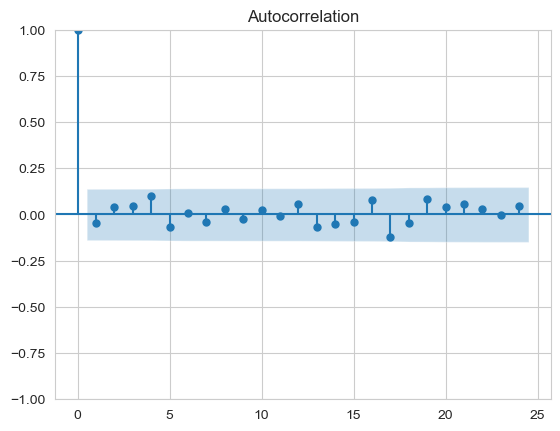

In [16]:
acf = smt.graphics.plot_acf(lin_reg.resid)
acf.show()

# Multivariate Normality

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8412\251815554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lin_reg.resid)


<Axes: ylabel='Density'>

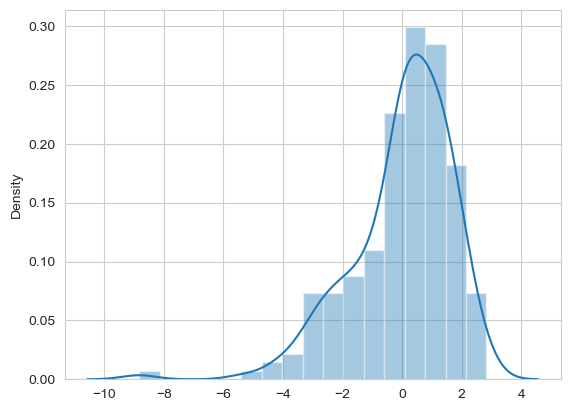

In [17]:
# Distplot
sns.distplot(lin_reg.resid)

In [18]:
import statsmodels.api as sm

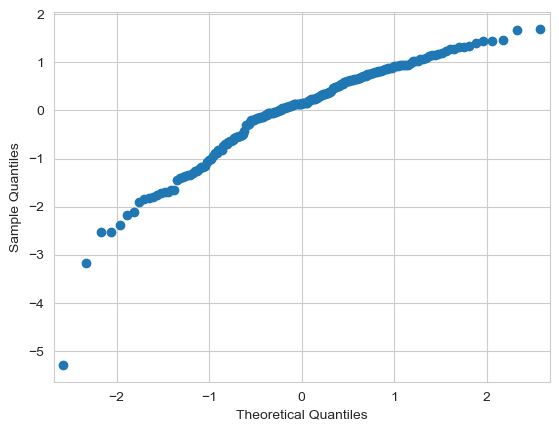

In [19]:
# Q_Q_plot

Q_Q_plot = sm.qqplot(lin_reg.resid,fit=True)

# Linearity

<Axes: ylabel='Sales'>

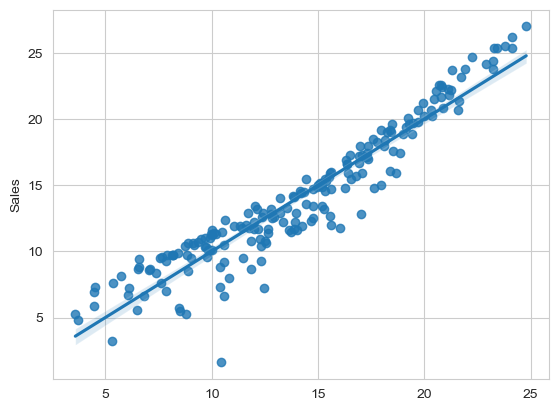

In [20]:
# regplot

sns.regplot(x=lin_reg.predict(X_constant),y=y)

In [21]:
# Rainbow test

sm.stats.diagnostic.linear_rainbow(res=lin_reg)   # 2nd value is p values

(0.889688658472882, 0.7185004116483373)

# Homoscedasticity

In [22]:
import statsmodels.stats.api as sms

In [23]:
sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

(1.3516832040090754, 0.07082060666290767, 'increasing')

# Multicolinearity

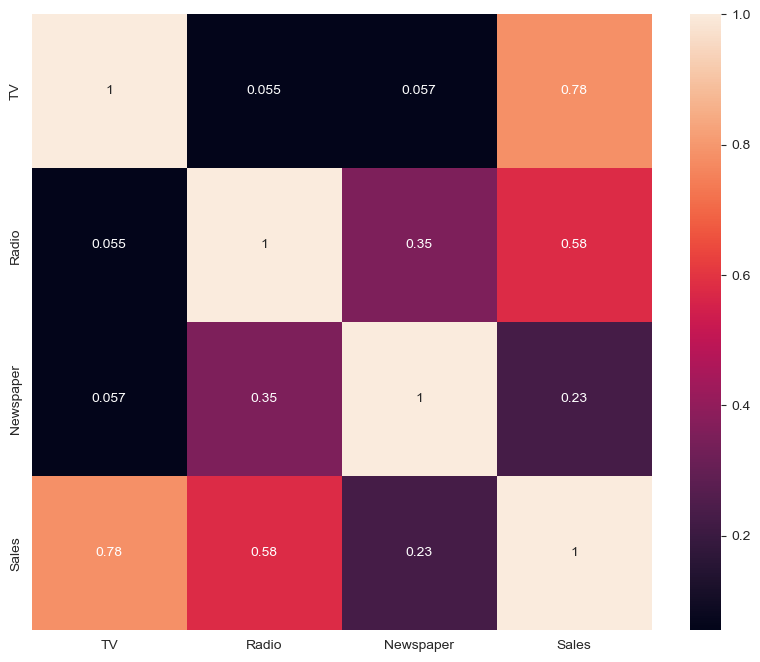

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(ad_data.corr(),annot=True)
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
X_constant.values

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [27]:
X_constant.shape

(200, 4)

In [28]:
vif = [variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[-1])]

In [29]:
vif

[6.848899953334954, 1.0046107849396502, 1.1449519171055353, 1.1451873787239288]

In [30]:
df = pd.DataFrame(vif,index=X_constant.columns,columns=['VIF'])

In [31]:
df

,VIF
const,6.848900
TV,1.004611
Radio,1.144952
Newspaper,1.145187
